In [1]:
import pandas as pd

In [56]:
df = pd.read_csv('./datasets/data.csv' , encoding='cp949')
df.drop('Unnamed: 0', axis=1,inplace=True)

In [6]:
df.head()

,회사명,회계년도,log(age),roa,cashflow,g,lvrg,주식수익률,시장가치대장부가치비율,최대주주지분율,주식수익률변동성,roa변동성,외국인지분율,소액주주지분율,총배당금,dps,시가배당률,dy변화,log시총,price
0,노루페인트,2011,1.791759,1.92,0.051375,19.61,0.542922,-0.101362,0.265360,68.10,0.027952,0.373229,0.98,0.390742,4.000000e+09,200.0,6.73,0.333114,24.807560,2970
1,노루페인트,2012,1.945910,0.90,-0.010534,8.16,0.577845,0.533670,0.409487,65.04,0.124571,0.551483,2.69,0.292903,4.000000e+09,200.0,4.39,-0.360563,25.235224,4555
2,노루페인트,2013,2.079442,2.23,0.029789,3.54,0.563906,0.121844,0.443551,65.12,0.049628,0.510294,0.53,0.371962,4.000000e+09,200.0,3.91,-0.093271,25.350198,5110
3,노루페인트,2014,2.197225,2.86,0.049130,5.69,0.556690,0.771037,0.750955,55.75,0.048862,0.695869,2.65,0.390875,4.000000e+09,200.0,2.21,-0.425003,25.921763,9050
4,노루페인트,2015,2.302585,5.86,0.050457,0.76,0.526612,0.232044,0.822974,54.59,0.093275,1.000616,3.46,0.389279,4.000000e+09,200.0,1.79,-0.140229,26.130438,11150


In [57]:
label = df['총배당금']
df.drop(['회계년도', '회사명', '총배당금'], axis=1, inplace=True)

In [8]:
df.head()

,log(age),roa,cashflow,g,lvrg,주식수익률,시장가치대장부가치비율,최대주주지분율,주식수익률변동성,roa변동성,외국인지분율,소액주주지분율,dps,시가배당률,dy변화,log시총,price
0,1.791759,1.92,0.051375,19.61,0.542922,-0.101362,0.265360,68.10,0.027952,0.373229,0.98,0.390742,200.0,6.73,0.333114,24.807560,2970
1,1.945910,0.90,-0.010534,8.16,0.577845,0.533670,0.409487,65.04,0.124571,0.551483,2.69,0.292903,200.0,4.39,-0.360563,25.235224,4555
2,2.079442,2.23,0.029789,3.54,0.563906,0.121844,0.443551,65.12,0.049628,0.510294,0.53,0.371962,200.0,3.91,-0.093271,25.350198,5110
3,2.197225,2.86,0.049130,5.69,0.556690,0.771037,0.750955,55.75,0.048862,0.695869,2.65,0.390875,200.0,2.21,-0.425003,25.921763,9050
4,2.302585,5.86,0.050457,0.76,0.526612,0.232044,0.822974,54.59,0.093275,1.000616,3.46,0.389279,200.0,1.79,-0.140229,26.130438,11150


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

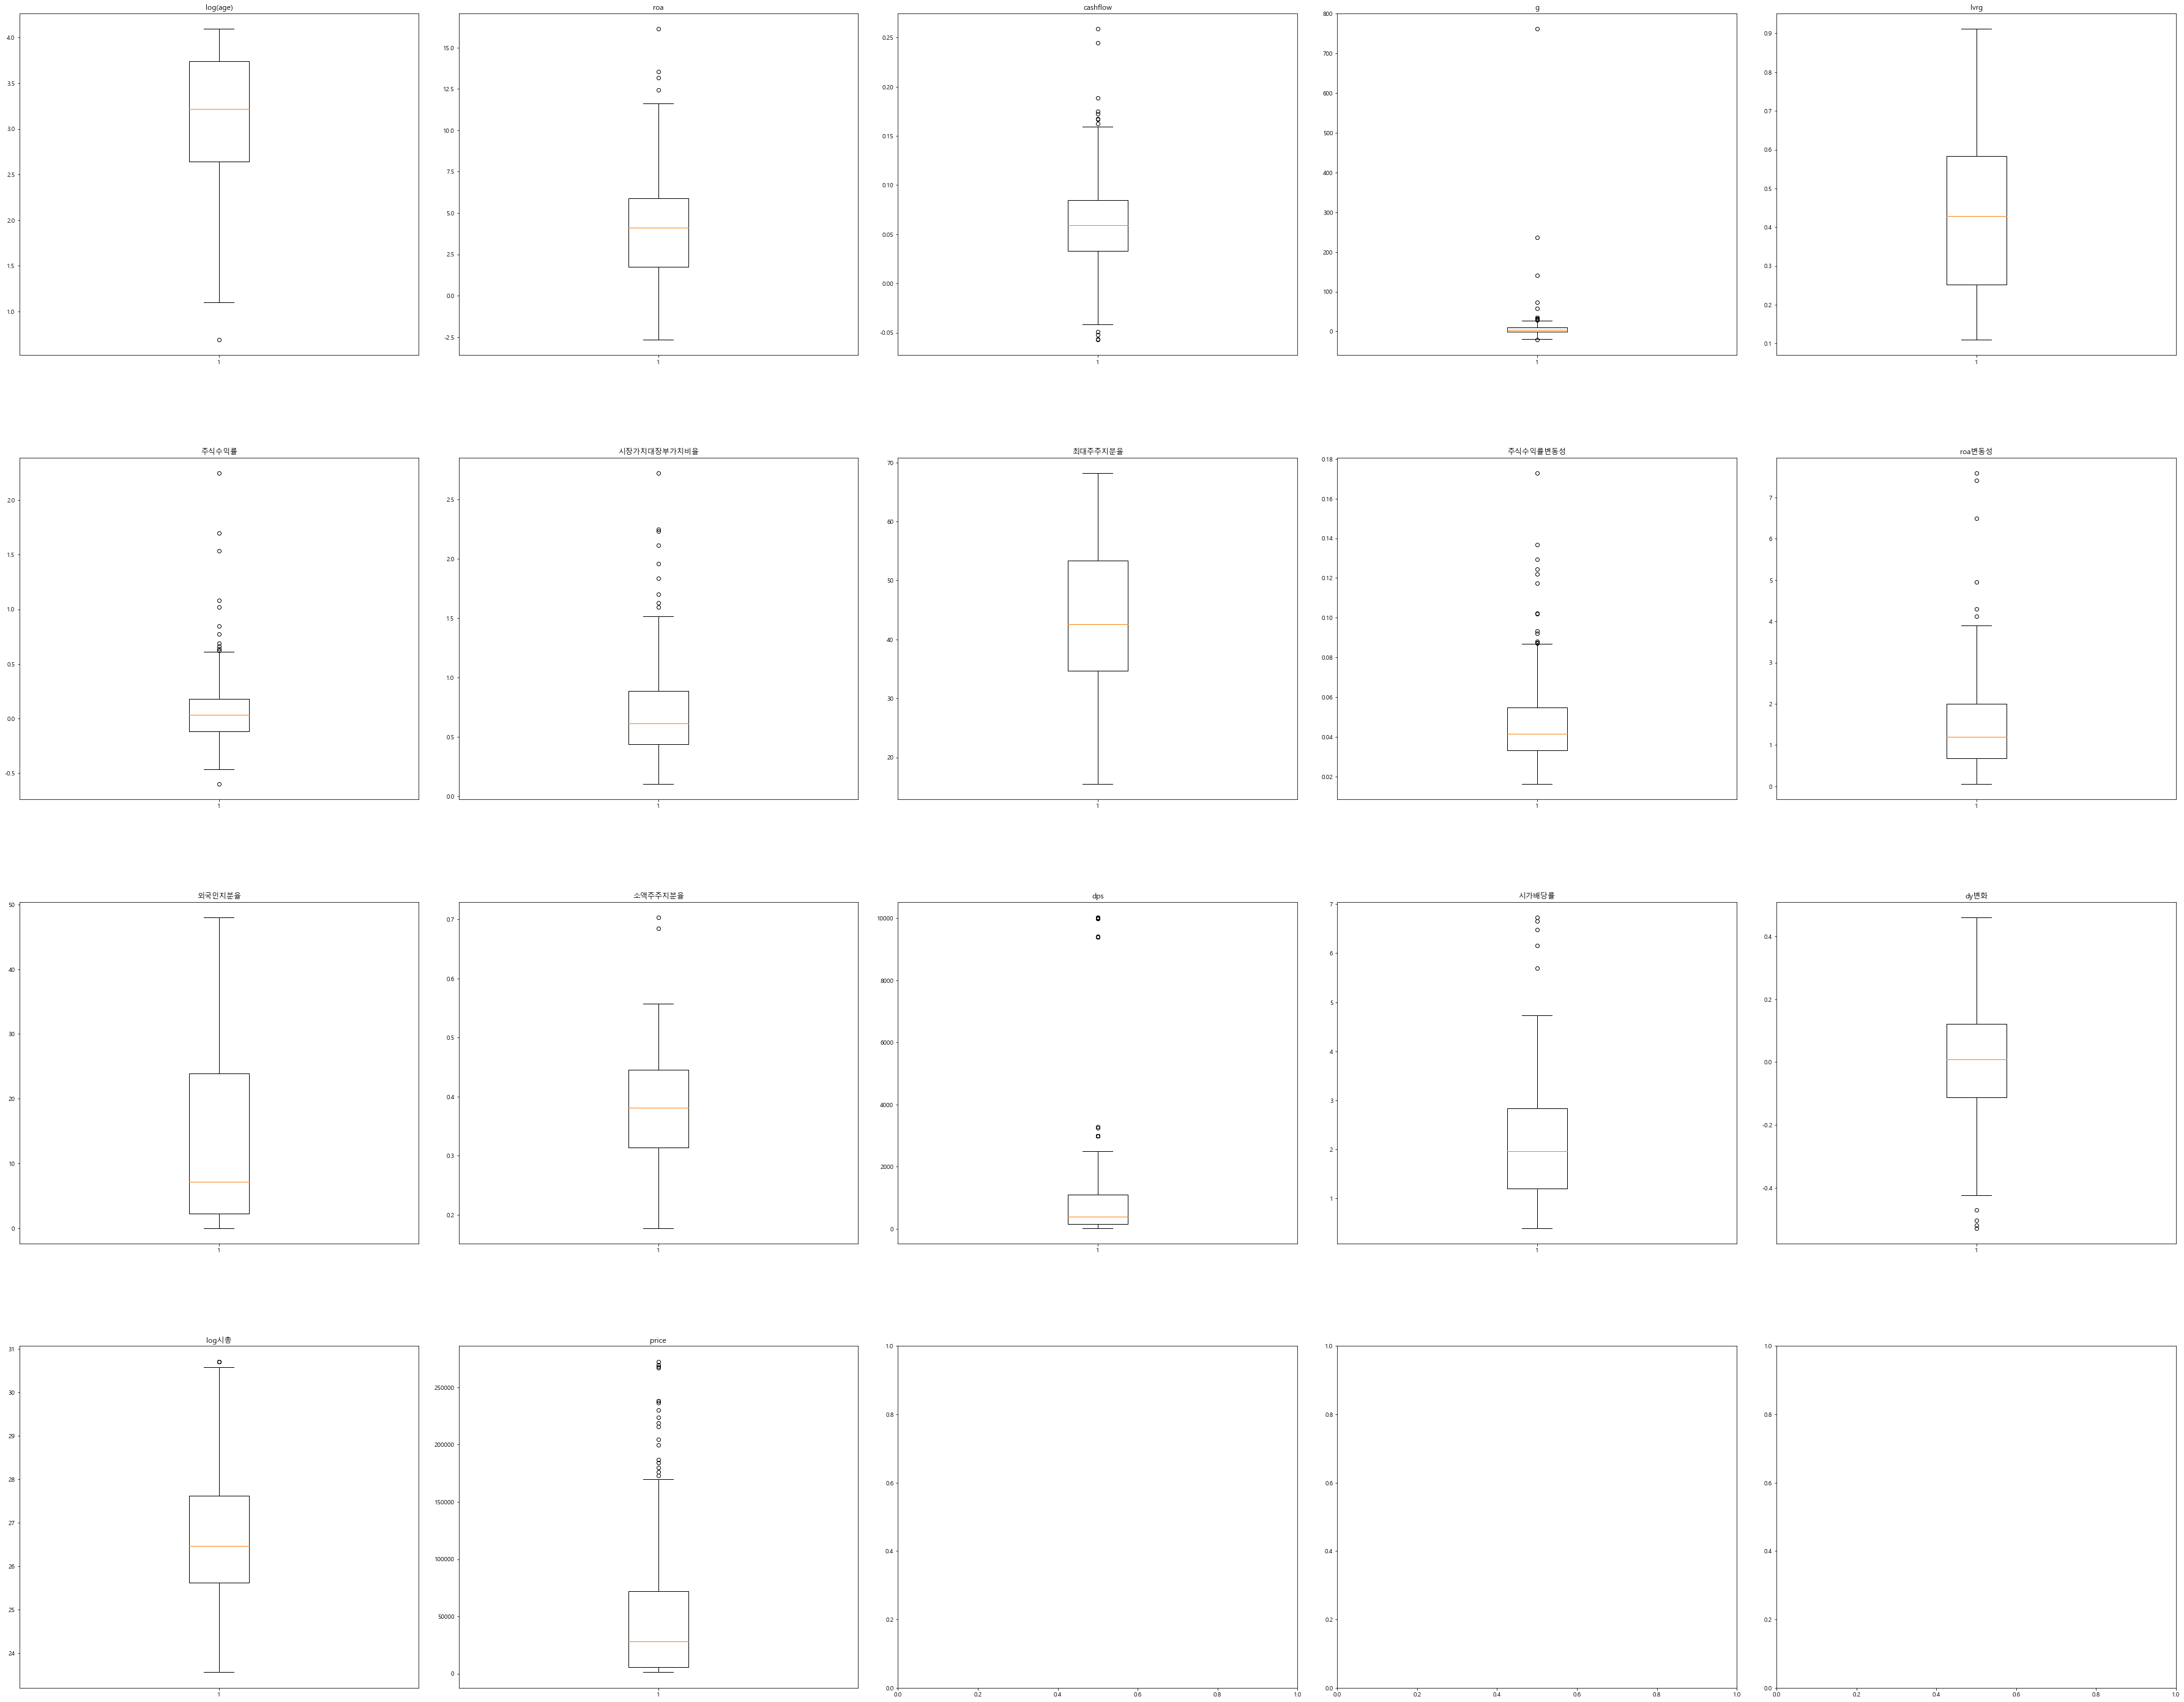

In [58]:
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [5, 4]
fig, axs = plt.subplots(4, 5)
try : 
    for i in range(0,4,1):
        for j in range(0,5,1):
            if i == 0 :
                axs[i,j].boxplot(df.iloc[:,j])
                axs[i,j].set_title(df.iloc[:,j].name)
            
            if i == 1 :
                axs[i,j].boxplot(df.iloc[:,j+5])
                axs[i,j].set_title(df.iloc[:,j+5].name)

            if i == 2 :
                axs[i,j].boxplot(df.iloc[:,j+10])
                axs[i,j].set_title(df.iloc[:,j+10].name)
            
            if i == 3 :
                axs[i,j].boxplot(df.iloc[:,j+15])
                axs[i,j].set_title(df.iloc[:,j+15].name)
 
                
        fig.subplots_adjust(left=0.01, right=9.8, bottom=0.5, top=10,
                        hspace=0.3, wspace=0.1)
except :
    pass 

C:\Users\LG\AppData\Local\Temp\ipykernel_11964\1789566122.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(df.corr(),dtype=np.bool)


<AxesSubplot:title={'center':'Wine Correlation of Features'}>

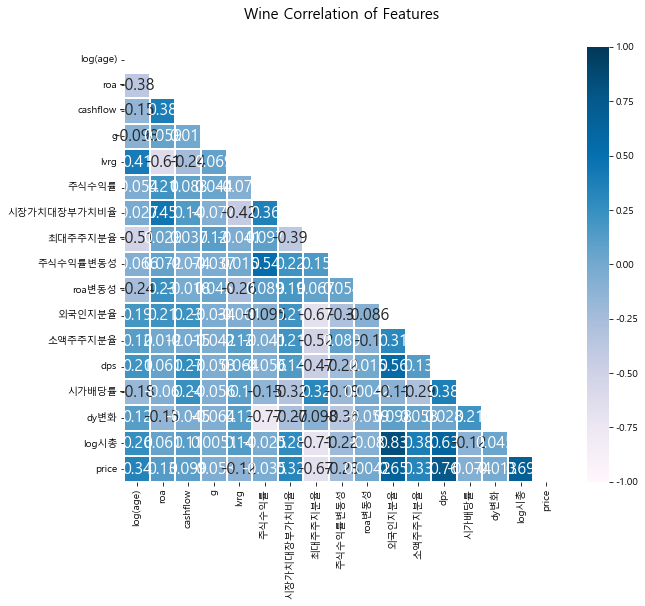

In [12]:
import numpy as np

mask=np.zeros_like(df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True


colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Wine Correlation of Features", y = 1.05, size = 15)
sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0, vmin = -1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, mask=mask ,annot_kws = {"size" : 16})

C:\Users\LG\AppData\Local\Temp\ipykernel_11964\3251550081.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')
C:\Users\LG\AppData\Local\Temp\ipykernel_11964\3251550081.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

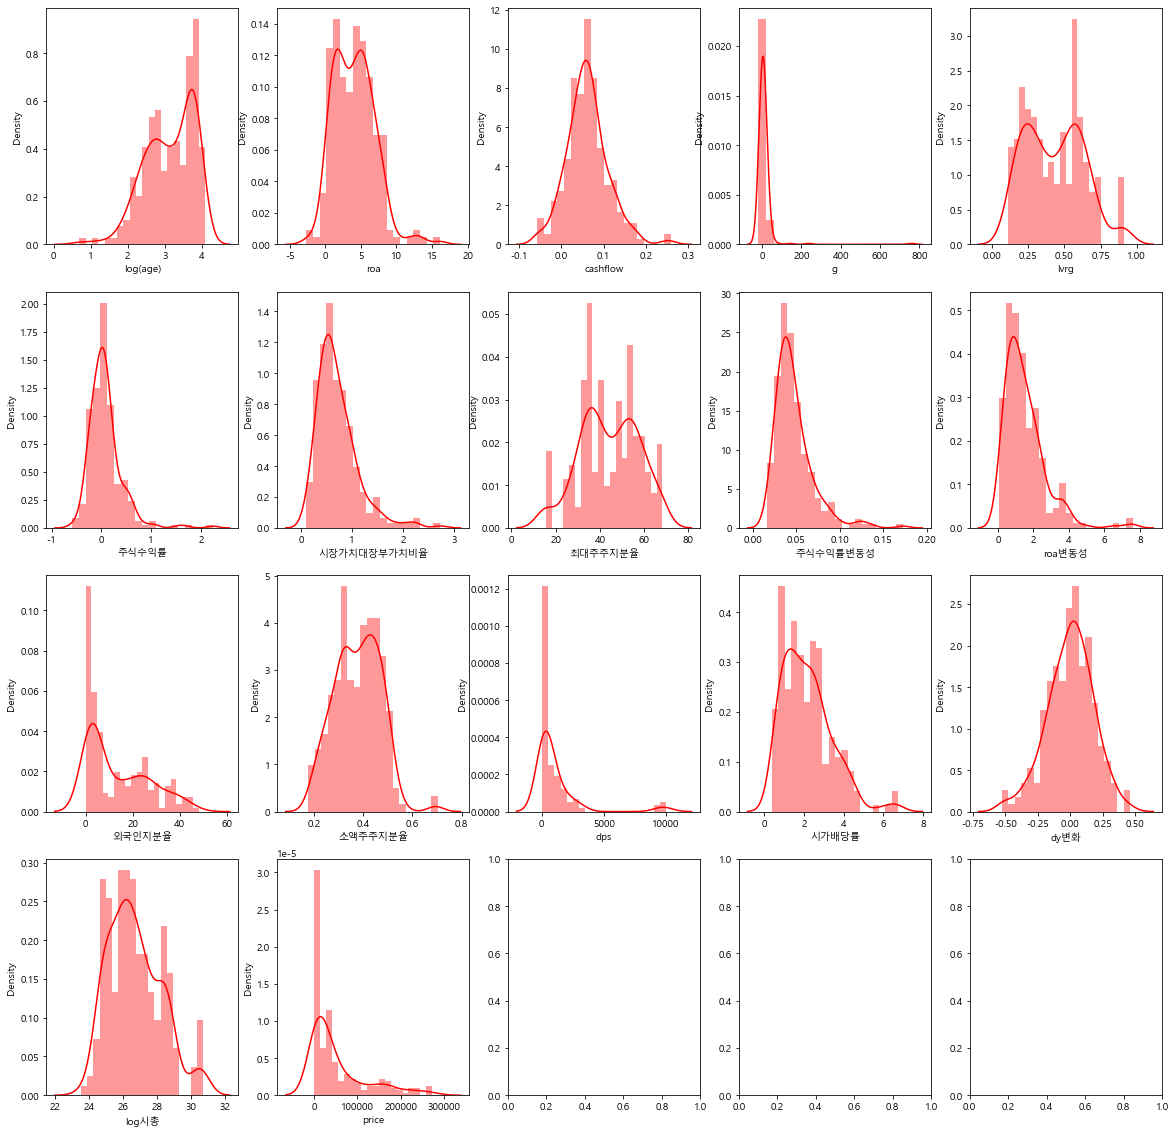

In [28]:
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
col_n = 5
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))


for i,col in enumerate(df.columns):
    sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')

In [29]:
# boxplot에서 보이는 이상치 처리 -> winsorizing 활용
# boxplot, 정규성 그래프를 확인하고 꼬리 기준으로 winsorize 실행
# 신뢰구간 99% 

from scipy.stats.mstats import winsorize

df['g'] = winsorize(df['g'], limits=[0, 0.05])
df['주식수익률'] = winsorize(df['주식수익률'], limits=[0,0.05])
df['시장가치대장부가치비율'] = winsorize(df['시장가치대장부가치비율'], limits=[0,0.05])
df['주식수익률변동성'] = winsorize(df['주식수익률변동성'], limits=[0,0.05])
df['roa변동성'] = winsorize(df['roa변동성'], limits=[0,0.01])
df['dps'] = winsorize(df['dps'], limits=[0,0.05])
df['price'] = winsorize(df['price'], limits=[0,0.05])

C:\Users\LG\AppData\Local\Temp\ipykernel_11964\3752163618.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')
C:\Users\LG\AppData\Local\Temp\ipykernel_11964\3752163618.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

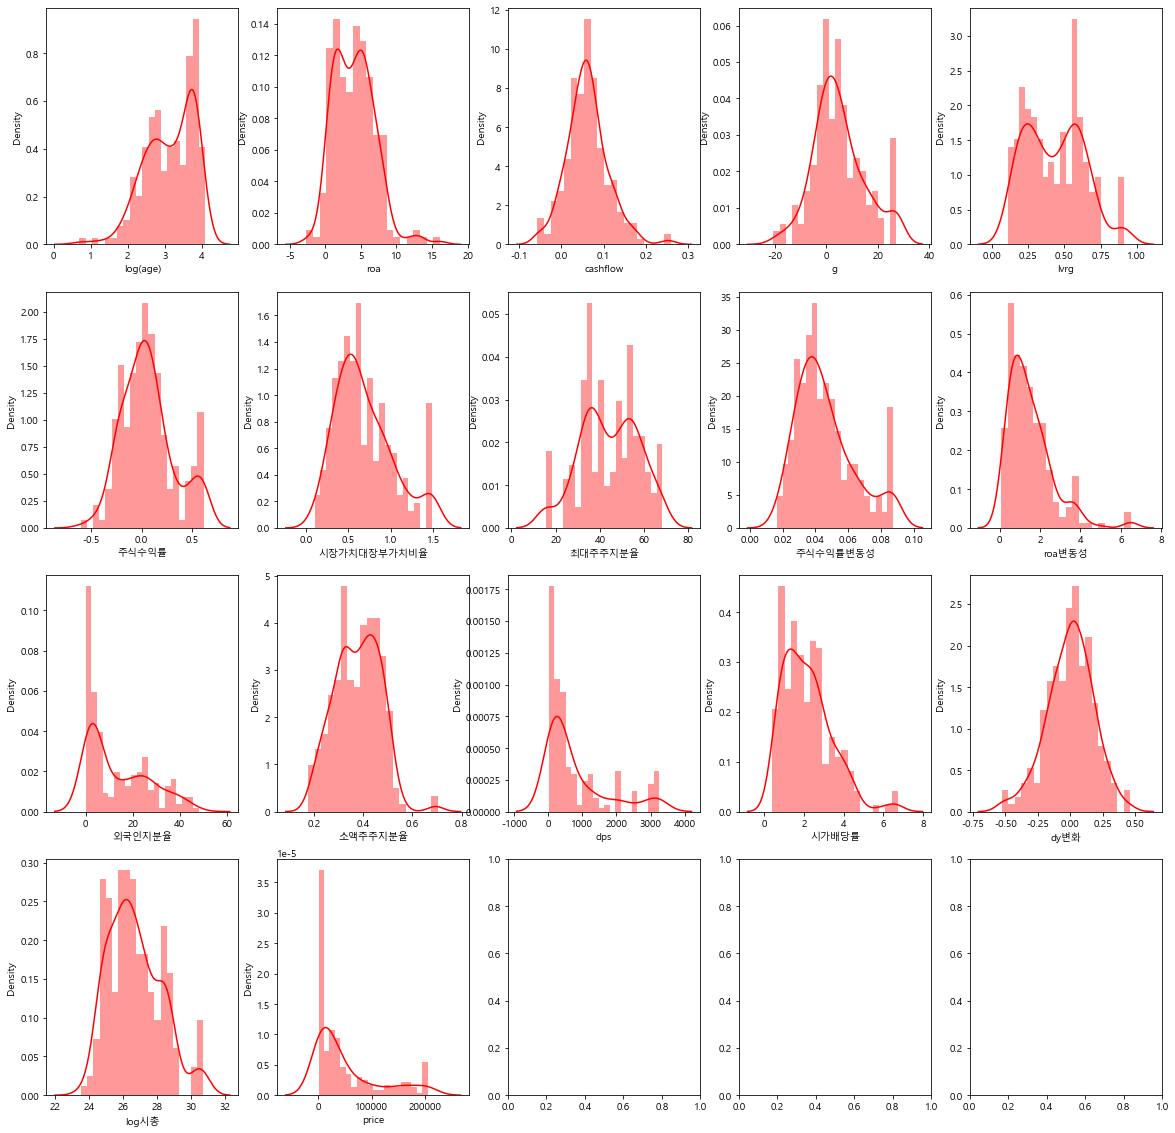

In [30]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
col_n = 5
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))


for i,col in enumerate(df.columns):
    sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')

In [31]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
model = sm.OLS(label, sm.add_constant(df)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총배당금   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     34.72
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           6.26e-52
Time:                        20:13:58   Log-Likelihood:                -6113.4
No. Observations:                 231   AIC:                         1.226e+04
Df Residuals:                     213   BIC:                         1.232e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.394e+12    2.2e+11     -6.328      0.000   -1.83e+12    -9.6e+11
log(age)     2.283e+09   1.24e+10      0.184      0.854   -2.21e+10    2.67e+10
roa          1.689e+09   2.88e+09      0.587      0.558   -3.98e+09    7.36e+09
cashflow     3.603e+11    1.3e+11      2.772      0.006    1.04e+11    6.17e+11
g           -2.364e+08    5.5e+08     -0.430      0.668   -1.32e+09    8.48e+08
lvrg         1.278e+11    4.3e+10      2.973      0.003    4.31e+10    2.13e+11
주식수익률       -8.526e+10   3.62e+10     -2.354      0.020   -1.57e+11   -1.39e+10
시장가치대장부가치비율  1.303e+11   2.44e+10      5.343      0.000    8.22e+10    1.78e+11
최대주주지분율      4.377e+08   9.17e+08      0.477      0.634   -1.37e+09    2.25e+09
주식수익률변동성     5.265e+11   3.51e+11      1.499      0.135   -1.66e+11    1.22e+12
roa변동성       4.166e+09   5.22e+09      0.798      0.426   -6.13e+09    1.45e+10
외국인지분율       5.973e+08   8.92e+08      0.670      0.504   -1.16e+09    2.36e+09
소액주주지분율     -8.063e+10   7.58e+10     -1.064      0.288    -2.3e+11    6.87e+10
dps          2.918e+07   1.49e+07      1.960      0.051   -1.61e+05    5.85e+07
시가배당률        6.039e+10   6.35e+09      9.513      0.000    4.79e+10    7.29e+10
dy변화        -1.237e+11   5.14e+10     -2.405      0.017   -2.25e+11   -2.23e+10
log시총        4.024e+10   7.78e+09      5.170      0.000    2.49e+10    5.56e+10
price        9.727e+04   2.39e+05      0.407      0.685   -3.74e+05    5.69e+05
==============================================================================
Omnibus:                       27.819   Durbin-Watson:                   0.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.893
Skew:                           0.711   Prob(JB):                     4.85e-10
Kurtosis:                       4.561   Cond. No.                     5.37e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns 

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,281.937515,log시총
1,51.354302,최대주주지분율
2,46.561295,log(age)
3,30.299501,소액주주지분율
4,13.120045,lvrg
5,13.011570,시장가치대장부가치비율
6,12.375907,dps
7,12.130318,price
8,11.170153,주식수익률변동성
9,9.355833,시가배당률


In [34]:
df.drop(['log(age)'], axis=1, inplace=True)

In [35]:
model = sm.OLS(label, sm.add_constant(df)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총배당금   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     37.06
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.03e-52
Time:                        20:18:32   Log-Likelihood:                -6113.5
No. Observations:                 231   AIC:                         1.226e+04
Df Residuals:                     214   BIC:                         1.232e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.375e+12   1.95e+11     -7.041      0.000   -1.76e+12    -9.9e+11
roa           1.65e+09   2.86e+09      0.577      0.565   -3.99e+09    7.29e+09
cashflow     3.633e+11   1.29e+11      2.823      0.005     1.1e+11    6.17e+11
g           -2.382e+08   5.49e+08     -0.434      0.665   -1.32e+09    8.44e+08
lvrg         1.306e+11   4.01e+10      3.255      0.001    5.15e+10     2.1e+11
주식수익률       -8.415e+10   3.56e+10     -2.361      0.019   -1.54e+11   -1.39e+10
시장가치대장부가치비율  1.297e+11   2.41e+10      5.375      0.000    8.22e+10    1.77e+11
최대주주지분율      3.605e+08   8.14e+08      0.443      0.658   -1.24e+09    1.97e+09
주식수익률변동성     5.293e+11    3.5e+11      1.512      0.132   -1.61e+11    1.22e+12
roa변동성       3.989e+09   5.12e+09      0.779      0.437    -6.1e+09    1.41e+10
외국인지분율       5.753e+08   8.82e+08      0.652      0.515   -1.16e+09    2.31e+09
소액주주지분율     -8.542e+10    7.1e+10     -1.203      0.230   -2.25e+11    5.45e+10
dps          2.919e+07   1.48e+07      1.966      0.051   -7.45e+04    5.85e+07
시가배당률        6.015e+10    6.2e+09      9.701      0.000    4.79e+10    7.24e+10
dy변화        -1.219e+11   5.04e+10     -2.418      0.016   -2.21e+11   -2.25e+10
log시총        3.999e+10   7.65e+09      5.229      0.000    2.49e+10    5.51e+10
price        1.064e+05   2.33e+05      0.456      0.649   -3.54e+05    5.66e+05
==============================================================================
Omnibus:                       27.783   Durbin-Watson:                   0.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.831
Skew:                           0.710   Prob(JB):                     5.00e-10
Kurtosis:                       4.560   Cond. No.                     5.37e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns 

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,160.949508,log시총
1,46.602588,최대주주지분율
2,28.157091,소액주주지분율
3,12.781313,시장가치대장부가치비율
4,12.569920,lvrg
5,12.308040,dps
6,12.043655,price
7,11.104513,주식수익률변동성
8,8.884819,시가배당률
9,7.595858,roa


In [37]:
df.drop(['최대주주지분율'], axis=1, inplace=True)

In [38]:
model = sm.OLS(label, sm.add_constant(df)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총배당금   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     39.66
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.76e-53
Time:                        20:19:44   Log-Likelihood:                -6113.6
No. Observations:                 231   AIC:                         1.226e+04
Df Residuals:                     215   BIC:                         1.231e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.346e+12   1.83e+11     -7.342      0.000   -1.71e+12   -9.84e+11
roa          1.999e+09   2.75e+09      0.728      0.467   -3.41e+09    7.41e+09
cashflow     3.715e+11   1.27e+11      2.922      0.004    1.21e+11    6.22e+11
g           -2.325e+08   5.48e+08     -0.424      0.672   -1.31e+09    8.47e+08
lvrg         1.314e+11      4e+10      3.283      0.001    5.25e+10     2.1e+11
주식수익률       -8.534e+10   3.55e+10     -2.405      0.017   -1.55e+11   -1.54e+10
시장가치대장부가치비율  1.254e+11    2.2e+10      5.696      0.000     8.2e+10    1.69e+11
주식수익률변동성      5.28e+11   3.49e+11      1.512      0.132    -1.6e+11    1.22e+12
roa변동성       4.158e+09    5.1e+09      0.816      0.415   -5.89e+09    1.42e+10
외국인지분율       4.633e+08   8.43e+08      0.549      0.583    -1.2e+09    2.13e+09
소액주주지분율     -9.547e+10   6.72e+10     -1.421      0.157   -2.28e+11    3.69e+10
dps          2.709e+07    1.4e+07      1.929      0.055   -5.89e+05    5.48e+07
시가배당률        6.107e+10   5.83e+09     10.466      0.000    4.96e+10    7.26e+10
dy변화        -1.261e+11   4.94e+10     -2.551      0.011   -2.24e+11   -2.87e+10
log시총        3.968e+10    7.6e+09      5.220      0.000    2.47e+10    5.47e+10
price        1.146e+05   2.32e+05      0.494      0.622   -3.43e+05    5.72e+05
==============================================================================
Omnibus:                       27.605   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.973
Skew:                           0.702   Prob(JB):                     4.66e-10
Kurtosis:                       4.580   Cond. No.                     5.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns 

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,66.719138,log시총
1,25.594505,소액주주지분율
2,12.518784,lvrg
3,12.043653,price
4,11.276324,dps
5,11.099780,주식수익률변동성
6,10.205742,시장가치대장부가치비율
7,7.968274,시가배당률
8,6.954070,roa
9,5.003354,외국인지분율


In [40]:
df.drop(['price'], axis=1, inplace=True)

In [41]:
model = sm.OLS(label, sm.add_constant(df)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총배당금   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     42.63
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           2.97e-54
Time:                        20:24:12   Log-Likelihood:                -6113.7
No. Observations:                 231   AIC:                         1.226e+04
Df Residuals:                     216   BIC:                         1.231e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.365e+12   1.79e+11     -7.648      0.000   -1.72e+12   -1.01e+12
roa          1.986e+09   2.74e+09      0.725      0.469   -3.42e+09    7.39e+09
cashflow     3.665e+11   1.27e+11      2.897      0.004    1.17e+11    6.16e+11
g            -2.14e+08   5.46e+08     -0.392      0.695   -1.29e+09    8.61e+08
lvrg         1.255e+11   3.81e+10      3.293      0.001    5.04e+10    2.01e+11
주식수익률       -8.677e+10   3.53e+10     -2.458      0.015   -1.56e+11   -1.72e+10
시장가치대장부가치비율  1.276e+11   2.15e+10      5.933      0.000    8.52e+10     1.7e+11
주식수익률변동성     5.201e+11   3.48e+11      1.493      0.137   -1.66e+11    1.21e+12
roa변동성       3.774e+09   5.03e+09      0.751      0.454   -6.14e+09    1.37e+10
외국인지분율       4.471e+08   8.41e+08      0.532      0.596   -1.21e+09     2.1e+09
소액주주지분율     -9.279e+10   6.68e+10     -1.389      0.166   -2.25e+11    3.89e+10
dps          3.285e+07   7.81e+06      4.209      0.000    1.75e+07    4.82e+07
시가배당률        6.001e+10   5.42e+09     11.072      0.000    4.93e+10    7.07e+10
dy변화         -1.28e+11   4.92e+10     -2.601      0.010   -2.25e+11    -3.1e+10
log시총        4.061e+10   7.35e+09      5.524      0.000    2.61e+10    5.51e+10
==============================================================================
Omnibus:                       28.404   Durbin-Watson:                   0.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.765
Skew:                           0.714   Prob(JB):                     1.90e-10
Kurtosis:                       4.615   Cond. No.                     8.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns 

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,64.842347,log시총
1,25.421506,소액주주지분율
2,11.719552,lvrg
3,11.051100,주식수익률변동성
4,9.498640,시장가치대장부가치비율
5,6.947194,roa
6,6.820467,시가배당률
7,4.878383,외국인지분율
8,3.676119,cashflow
9,3.313031,roa변동성


In [43]:
df.drop(['g'], axis=1, inplace=True)

In [44]:
model = sm.OLS(label, sm.add_constant(df)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총배당금   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     46.07
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           4.62e-55
Time:                        20:25:39   Log-Likelihood:                -6113.8
No. Observations:                 231   AIC:                         1.226e+04
Df Residuals:                     217   BIC:                         1.230e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.365e+12   1.78e+11     -7.660      0.000   -1.72e+12   -1.01e+12
roa          1.733e+09   2.66e+09      0.652      0.515   -3.51e+09    6.97e+09
cashflow     3.746e+11   1.25e+11      3.006      0.003    1.29e+11     6.2e+11
lvrg          1.24e+11   3.79e+10      3.277      0.001    4.94e+10    1.99e+11
주식수익률       -8.772e+10   3.51e+10     -2.496      0.013   -1.57e+11   -1.85e+10
시장가치대장부가치비율  1.279e+11   2.15e+10      5.963      0.000    8.56e+10     1.7e+11
주식수익률변동성     5.209e+11   3.48e+11      1.498      0.136   -1.64e+11    1.21e+12
roa변동성       3.651e+09   5.01e+09      0.729      0.467   -6.22e+09    1.35e+10
외국인지분율       4.559e+08   8.39e+08      0.543      0.587    -1.2e+09    2.11e+09
소액주주지분율     -9.419e+10   6.66e+10     -1.414      0.159   -2.25e+11    3.71e+10
dps          3.288e+07   7.79e+06      4.220      0.000    1.75e+07    4.82e+07
시가배당률        6.009e+10   5.41e+09     11.116      0.000    4.94e+10    7.07e+10
dy변화          -1.3e+11   4.88e+10     -2.661      0.008   -2.26e+11   -3.37e+10
log시총        4.061e+10   7.34e+09      5.535      0.000    2.61e+10    5.51e+10
==============================================================================
Omnibus:                       28.432   Durbin-Watson:                   0.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.915
Skew:                           0.714   Prob(JB):                     1.77e-10
Kurtosis:                       4.621   Cond. No.                     8.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns 

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,64.810473,log시총
1,25.349106,소액주주지분율
2,11.598799,lvrg
3,11.050670,주식수익률변동성
4,9.485703,시장가치대장부가치비율
5,6.810381,시가배당률
6,6.558400,roa
7,4.873653,외국인지분율
8,3.578862,cashflow
9,3.300108,roa변동성


In [46]:
df.drop(['외국인지분율'], axis=1, inplace=True)

In [47]:
model = sm.OLS(label, sm.add_constant(df)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총배당금   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     50.05
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           7.37e-56
Time:                        20:26:31   Log-Likelihood:                -6113.9
No. Observations:                 231   AIC:                         1.225e+04
Df Residuals:                     218   BIC:                         1.230e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.433e+12   1.27e+11    -11.244      0.000   -1.68e+12   -1.18e+12
roa          2.018e+09    2.6e+09      0.775      0.439   -3.11e+09    7.15e+09
cashflow     3.863e+11   1.23e+11      3.153      0.002    1.45e+11    6.28e+11
lvrg         1.201e+11   3.71e+10      3.238      0.001     4.7e+10    1.93e+11
주식수익률       -8.728e+10   3.51e+10     -2.488      0.014   -1.56e+11   -1.81e+10
시장가치대장부가치비율  1.258e+11   2.11e+10      5.974      0.000    8.43e+10    1.67e+11
주식수익률변동성     4.941e+11   3.44e+11      1.438      0.152   -1.83e+11    1.17e+12
roa변동성       3.278e+09   4.95e+09      0.662      0.509   -6.48e+09     1.3e+10
소액주주지분율     -9.469e+10   6.65e+10     -1.424      0.156   -2.26e+11    3.63e+10
dps          3.373e+07   7.62e+06      4.427      0.000    1.87e+07    4.87e+07
시가배당률        5.951e+10   5.29e+09     11.248      0.000    4.91e+10    6.99e+10
dy변화        -1.275e+11   4.86e+10     -2.626      0.009   -2.23e+11   -3.18e+10
log시총        4.351e+10   5.02e+09      8.675      0.000    3.36e+10    5.34e+10
==============================================================================
Omnibus:                       27.801   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.233
Skew:                           0.707   Prob(JB):                     4.09e-10
Kurtosis:                       4.579   Cond. No.                     8.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns 

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,58.635324,log시총
1,25.348875,소액주주지분율
2,11.593238,lvrg
3,10.102470,주식수익률변동성
4,9.484931,시장가치대장부가치비율
5,6.353284,roa
6,5.798594,시가배당률
7,3.475851,cashflow
8,3.163716,주식수익률
9,3.148092,roa변동성


In [50]:
df.drop(['roa'], axis=1, inplace=True)

In [51]:
model = sm.OLS(label, sm.add_constant(df)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총배당금   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     54.65
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.31e-56
Time:                        20:27:41   Log-Likelihood:                -6114.2
No. Observations:                 231   AIC:                         1.225e+04
Df Residuals:                     219   BIC:                         1.229e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.437e+12   1.27e+11    -11.308      0.000   -1.69e+12   -1.19e+12
cashflow     4.123e+11   1.18e+11      3.501      0.001     1.8e+11    6.44e+11
lvrg         1.061e+11   3.23e+10      3.279      0.001    4.23e+10     1.7e+11
주식수익률        -8.23e+10   3.45e+10     -2.389      0.018    -1.5e+11   -1.44e+10
시장가치대장부가치비율  1.287e+11   2.07e+10      6.215      0.000    8.79e+10     1.7e+11
주식수익률변동성     5.121e+11   3.42e+11      1.495      0.136   -1.63e+11    1.19e+12
roa변동성       3.705e+09   4.92e+09      0.753      0.452   -5.99e+09    1.34e+10
소액주주지분율     -9.174e+10   6.63e+10     -1.383      0.168   -2.22e+11     3.9e+10
dps          3.303e+07   7.56e+06      4.370      0.000    1.81e+07    4.79e+07
시가배당률        5.974e+10   5.28e+09     11.320      0.000    4.93e+10    7.01e+10
dy변화        -1.229e+11   4.81e+10     -2.553      0.011   -2.18e+11    -2.8e+10
log시총        4.399e+10   4.97e+09      8.847      0.000    3.42e+10    5.38e+10
==============================================================================
Omnibus:                       27.473   Durbin-Watson:                   0.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.232
Skew:                           0.694   Prob(JB):                     4.10e-10
Kurtosis:                       4.601   Cond. No.                     8.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
df.drop(['roa변동성'], axis=1, inplace=True)

In [53]:
model = sm.OLS(label, sm.add_constant(df)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총배당금   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     60.17
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           2.16e-57
Time:                        20:28:14   Log-Likelihood:                -6114.5
No. Observations:                 231   AIC:                         1.225e+04
Df Residuals:                     220   BIC:                         1.229e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.422e+12   1.25e+11    -11.349      0.000   -1.67e+12   -1.17e+12
cashflow     4.039e+11   1.17e+11      3.449      0.001    1.73e+11    6.35e+11
lvrg          1.02e+11   3.19e+10      3.201      0.002    3.92e+10    1.65e+11
주식수익률       -8.124e+10   3.44e+10     -2.362      0.019   -1.49e+11   -1.35e+10
시장가치대장부가치비율  1.308e+11   2.05e+10      6.386      0.000    9.05e+10    1.71e+11
주식수익률변동성     5.264e+11   3.42e+11      1.541      0.125   -1.47e+11     1.2e+12
소액주주지분율     -9.619e+10    6.6e+10     -1.458      0.146   -2.26e+11    3.39e+10
dps          3.374e+07   7.49e+06      4.502      0.000     1.9e+07    4.85e+07
시가배당률        5.982e+10   5.27e+09     11.350      0.000    4.94e+10    7.02e+10
dy변화        -1.216e+11   4.81e+10     -2.529      0.012   -2.16e+11   -2.68e+10
log시총        4.365e+10   4.95e+09      8.824      0.000    3.39e+10    5.34e+10
==============================================================================
Omnibus:                       27.196   Durbin-Watson:                   0.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.928
Skew:                           0.677   Prob(JB):                     2.89e-10
Kurtosis:                       4.652   Cond. No.                     8.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

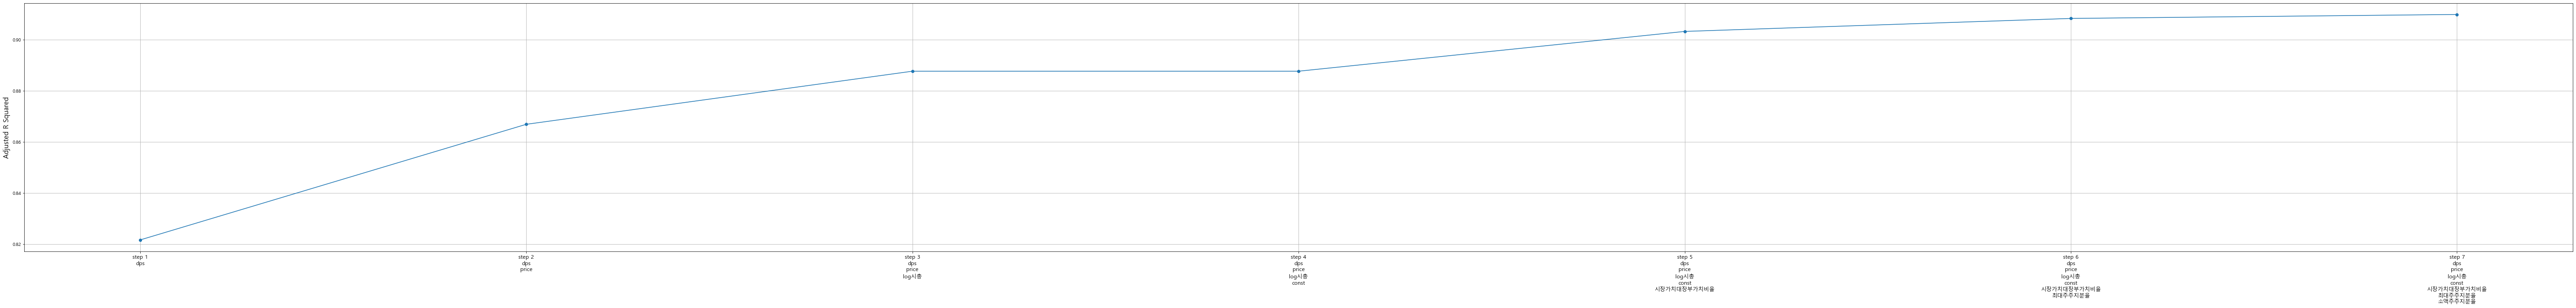

In [59]:
X_train = sm.add_constant(df)
y_train = label

def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
      
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables
    

selected_variables = stepwise_feature_selection(X_train, y_train)